In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn import metrics
import shap
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/mordred2.csv')
y = pd.DataFrame(data['Yield'],columns=['Yield'])
X = data.drop(columns=['Yield', 'Ligand_name', 'Ligand_smiles', 'Substrate_name'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300, shuffle=False)
print(y_train.head())
print(X_train.head())

   Yield
0   20.0
1    9.0
2    7.0
3   18.0
4   34.0
   L_nAcid  L_nBase  L_nAromAtom  L_nAromBond  L_nAtom  L_nHeavyAtom  \
0      0.0      0.0         24.0         24.0     49.0          27.0   
1      0.0      0.0         24.0         24.0     49.0          27.0   
2      0.0      0.0         24.0         24.0     49.0          27.0   
3      0.0      0.0         24.0         24.0     49.0          27.0   
4      0.0      0.0         24.0         24.0     49.0          27.0   

   L_nBridgehead  L_nHetero  L_nH  L_nC  ...   S_SRW10   S_TSRW10        S_MW  \
0            0.0        2.0  22.0  25.0  ...  9.282754  45.217583  182.073165   
1            0.0        2.0  22.0  25.0  ...  9.508591  48.143524  210.104465   
2            0.0        2.0  22.0  25.0  ...  9.599608  50.610520  242.094294   
3            0.0        2.0  22.0  25.0  ...  9.508591  48.143524  218.054321   
4            0.0        2.0  22.0  25.0  ...  8.590258  37.289972  120.057515   

      S_AMW  S_WPath  S_WP

In [3]:
param = {"max_leaf_nodes": [3, 5, 7, 15], "max_depth": [4, 6, 8], "l2_regularization": [0, 0.1, 1]}
reg = GridSearchCV(HistGradientBoostingRegressor(random_state=0, max_bins=51, min_samples_leaf=5),
                   param_grid=param, cv=5, n_jobs=16)
reg.fit(X_train,y_train['Yield'])
best = reg.best_estimator_
print(reg.best_params_)
y_pred = best.predict(X_train)

print(metrics.r2_score(y_train, y_pred))

{'l2_regularization': 1, 'max_depth': 4, 'max_leaf_nodes': 15}
0.9895856239926114


Text(0, 0.5, 'prediction')

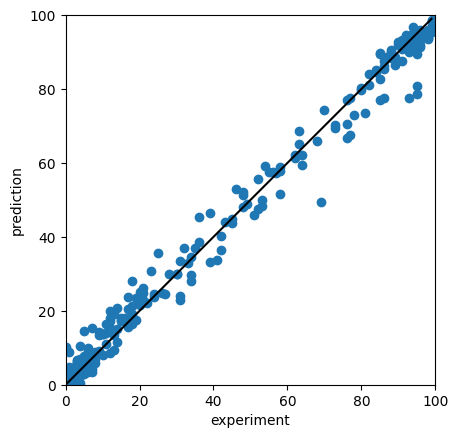

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(0,100),range(0,100), c = "black")
plt.scatter(y_train, y_pred)
plt.xlim(0,100)
plt.ylim(0,100)
ax.set_aspect('equal', adjustable='box')
plt.xlabel("experiment")
plt.ylabel("prediction")

In [5]:
explainer = shap.TreeExplainer(best)
shap_values1 = explainer(X_train)
shap_values2 = explainer(X_test)

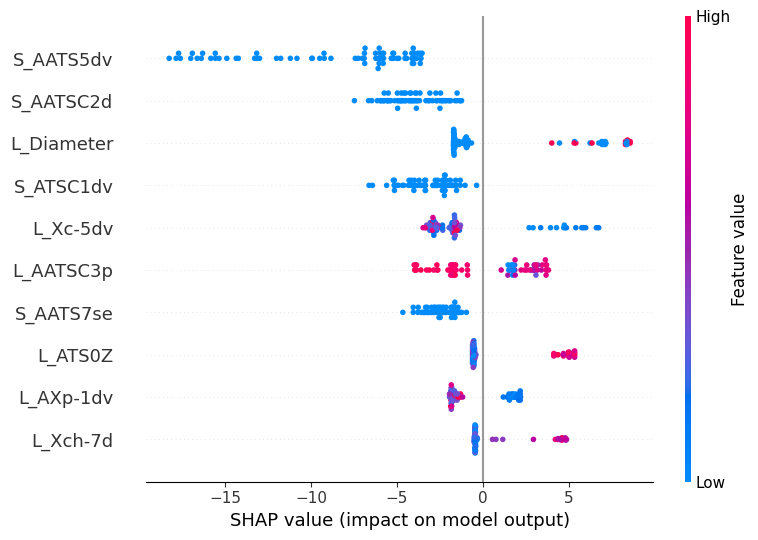

In [6]:
shap.summary_plot(shap_values2, max_display=10, show=False)
plt.savefig('result/SHAP/scatter/summary.pdf')
plt.show()

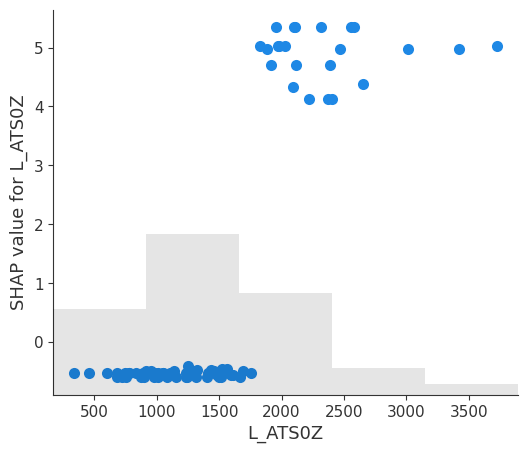

In [7]:
target = 'L_ATS0Z'
shap.plots.scatter(shap_values2[:, target], dot_size=64, show=False)
plt.ylabel(f'SHAP value for {target}')
plt.savefig(f'result/SHAP/scatter/scatter_{target}.pdf')
plt.show()

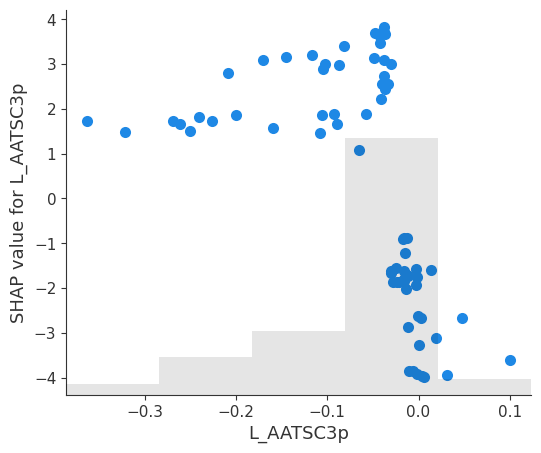

In [8]:
target = 'L_AATSC3p'
shap.plots.scatter(shap_values2[:, target], dot_size=64, show=False)
plt.ylabel(f'SHAP value for {target}')
plt.savefig(f'result/SHAP/scatter/scatter_{target}.pdf')
plt.show()

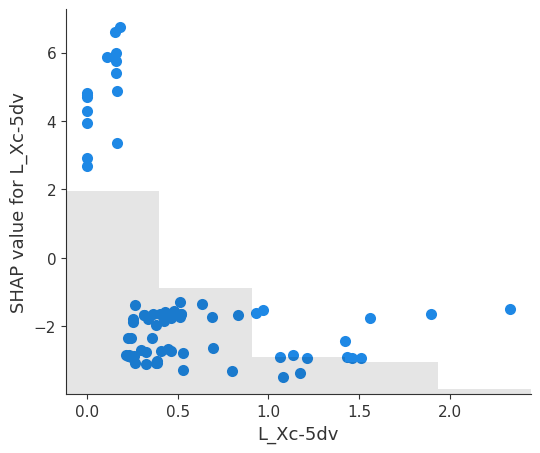

In [9]:
target = 'L_Xc-5dv'
shap.plots.scatter(shap_values2[:, target], dot_size=64, show=False)
plt.ylabel(f'SHAP value for {target}')
plt.savefig(f'result/SHAP/scatter/scatter_{target}.pdf')
plt.show()

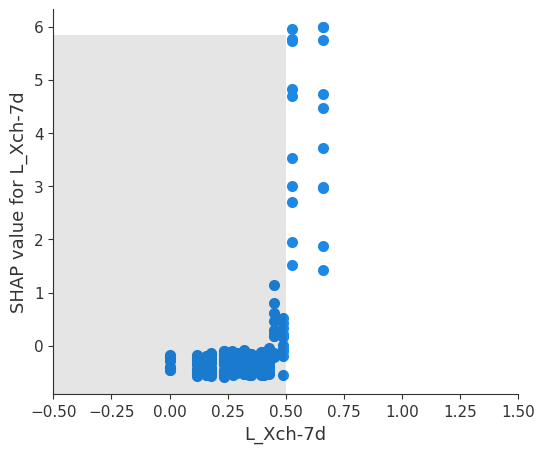

In [10]:
target = 'L_Xch-7d'
shap.plots.scatter(shap_values1[:, target], dot_size=64, show=False)
plt.ylabel(f'SHAP value for {target}')
plt.savefig(f'result/SHAP/scatter/scatter_training_{target}.pdf')
plt.show()

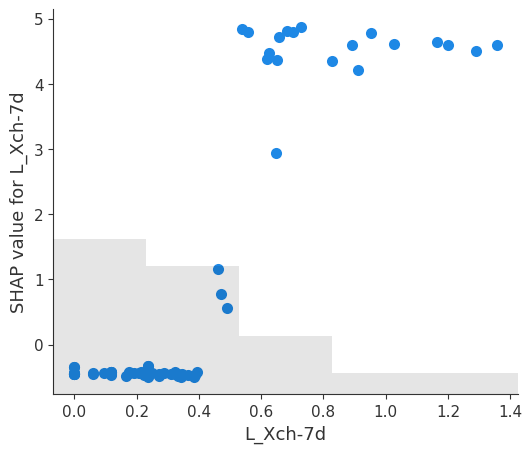

In [11]:
target = 'L_Xch-7d'
shap.plots.scatter(shap_values2[:, target], dot_size=64, show=False)
plt.ylabel(f'SHAP value for {target}')
plt.savefig(f'result/SHAP/scatter/scatter_{target}.pdf')
plt.show()

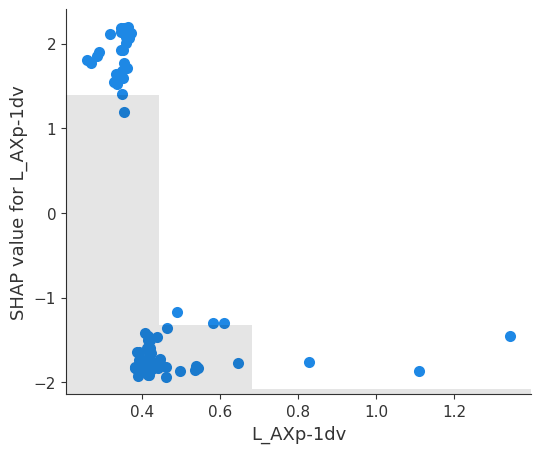

In [12]:
target = 'L_AXp-1dv'
shap.plots.scatter(shap_values2[:, target], dot_size=64, show=False)
plt.ylabel(f'SHAP value for {target}')
plt.savefig(f'result/SHAP/scatter/scatter_{target}.pdf')
plt.show()

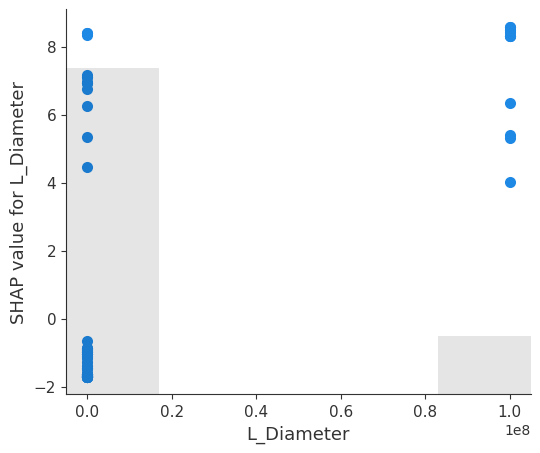

In [13]:
target = 'L_Diameter'
shap.plots.scatter(shap_values2[:, target], dot_size=64, show=False)
plt.ylabel(f'SHAP value for {target}')
plt.savefig(f'result/SHAP/scatter/scatter_{target}.pdf')
plt.show()

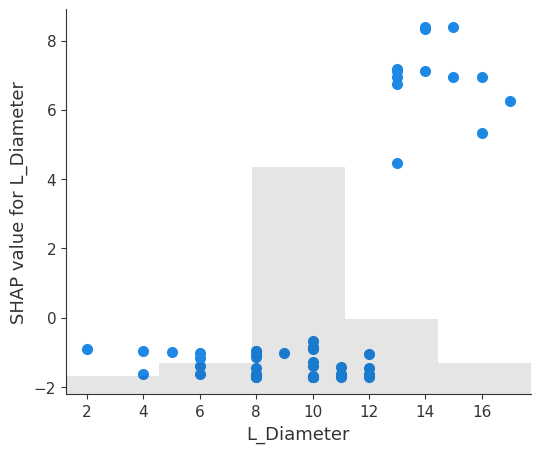

In [14]:
X_test2 = X_test.drop(index=[302, 304, 307, 316, 345, 349, 351, 358, 320, 340, 367])
shap_values3 = explainer(X_test2)
target = 'L_Diameter'
shap.plots.scatter(shap_values3[:, target], dot_size=64, show=False)
plt.ylabel(f'SHAP value for {target}')
plt.savefig(f'result/SHAP/scatter/scatter_{target}_drop_ionic.pdf')
plt.show()

In [15]:
# Output PDF files were deleted in Github.